Gradient Descent
--------

# Theory

## Definition


## Examples


# Implementation


## Imports

In [2]:
import numpy as np
import sympy as sp
import pandas as pd
from sympy.abc import x
from typing import Callable
import matplotlib.pyplot as plt
import warnings

In [113]:
domain = [-2,3]
func = x**2         # use sp. methods only "i.e sp.cos()"

## Algorithm


In [114]:
def GD(f_prime: Callable, x_0: float, gamma: float, TOL: float = 1e-5, maxiter: int = int(1e5)) -> tuple[float, float, int]:
    '''
    _summary_

    Args:
        f_prime: _description_
        x_0: _description_
        gamma: _description_
        TOL: _description_. Defaults to 1e-5.
        maxiter: _description_. Defaults to int(1e5).

    Returns:
        _description_
    '''

    x = np.zeros(maxiter)
    x[0] = x_0

    for i in range(maxiter):
        
        x[i+1] = x[i] - gamma*f_prime(x[i])
        delta_x = abs(x[i] - x[i+1])

        # convergence condition
        if delta_x < TOL:
            break


        # handel divergence & not enough iterations
        if delta_x > 1e6:
            warnings.warn(f"GD diverged where delta x = {delta_x}, choose smaller step size")
            break
        elif i+1==maxiter-1:
            warnings.warn(f"GD need more iterations steps = {i+1}, increase maxiter argument")
            break
    
    x_min, history, steps= x[i+1], x[:i+2], i+1

    return x_min, history, steps

## Results Visualization & Basic Convergence Analysis
This investigation aims to illustrate the convergence of gradient descent algorithm and show case it behavior. The following metrics/visualization used are
- Function Plot: Illustrate the journey of gradient decent optimizer
- x Value Convergence Plot: How fast the value of x converged to the expect 

In [160]:
# domain
xx = np.linspace(*domain)

# function
f = sp.lambdify('x', func)

# function derivative
f_prime = sp.lambdify('x', sp.diff(func))

# gradient decent
x_min, history, steps = GD(f_prime=f_prime, x_0=2.5, gamma=0.75)

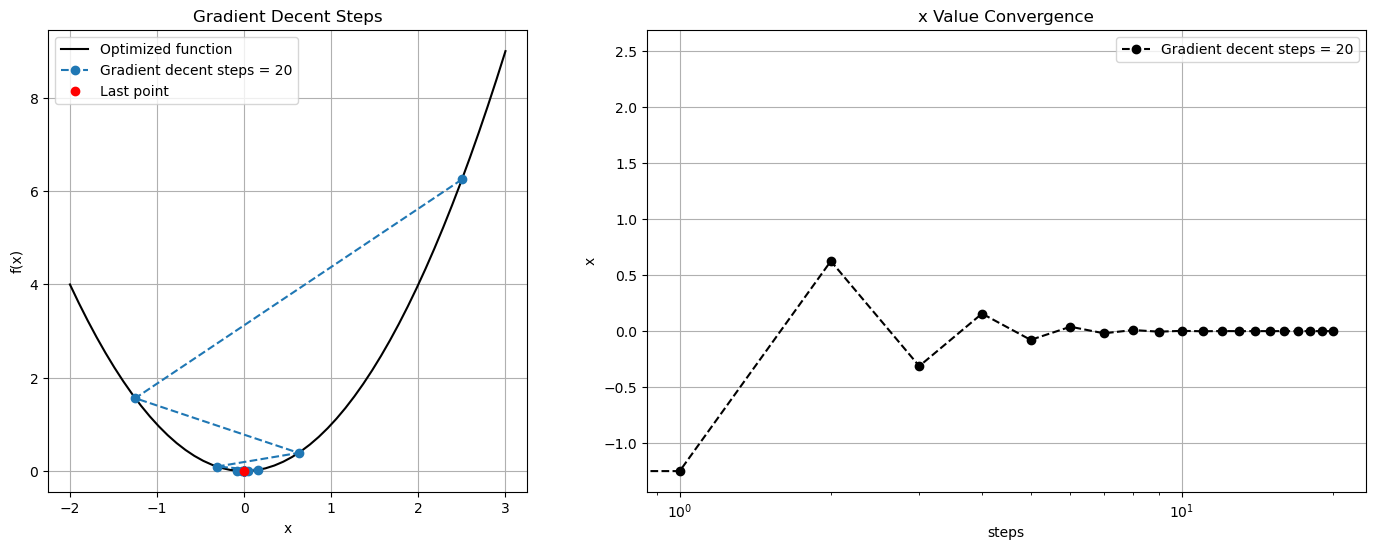

In [164]:
fig, ax = plt.subplots(1,2, figsize=(17,6), gridspec_kw={'width_ratios': [1, 1.5]})

# gradient decent steps plot
ax[0].plot(xx, f(xx), "k", label="Optimized function")
ax[0].plot(history, f(history), "--o", label=f"Gradient decent steps = {steps}")
ax[0].plot(history[-1], f(history[-1]), "ro", label="Last point")
ax[0].set(xlabel="x", ylabel="f(x)", title="Gradient Decent Steps")
ax[0].grid(True)
ax[0].legend()

# x value convergence
ax[1].plot(range(steps+1), history, "k--o", label=f"Gradient decent steps = {steps}")
ax[1].set(xscale='log', xlabel="steps", ylabel="x", title="x Value Convergence")
ax[1].grid(True)
ax[1].legend()

plt.show()